In [94]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [95]:
def SISGil(rate,n0,T):
    
    n = np.copy(n0)
    N = np.sum(n)
    change = np.zeros(len(n0),int)
    
    output = np.append(0,n0)
    
    t=0.0
    
    while(t < T):
        
        a1 = rate[0][1] * n[0] * n[1]/N
        a2 = a1 + rate[1][0] * n[1]
        
        dt = -np.log( np.random.uniform(0.0,1.0) ) / a2
        t += dt
        
        p = np.random.uniform(0.0,1.0)*a2
        
        if(p<a1):
            n[0] = n[0]-1
            n[1] = n[1]+1
        
        else:
            n[0] = n[0]+1
            n[1] = n[1]-1
            
        output = np.vstack((output, np.append(t,n)))
    
    return output
    

In [96]:
def SISTauLeap(rate, n0, T):
    
    dt = 1
    n = np.copy(n0)
    N = np.sum(n)
    change = np.zeros(len(n0),int)
    
    output = np.append(0,n0)
    
    t=0.0
    
    while(t < T):
        
        change[0] = np.random.poisson( rate[0][1] * n[0]* n[1] * dt/N )
        change[1] = np.random.poisson( rate[1][0] * n[1] * dt)
        
        n[0] = n[0] - change[0] + change[1]
        n[1] = n[1] + change[0] - change[1]
        
        t += dt
        
        output = np.vstack((output, np.append(t,n)))
        
    
    return output
    

In [100]:
n_states = 2

rate_array = np.zeros((n_states,n_states))

rate_array[1][0] = 0.1
rate_array[0][1] = 0.2

init = [900,100]

n_iter = 10

s = time.time()
test = SISTauLeap(rate_array, init,100)
e = time.time()

for i in range(0,n_iter-1):
    test = test + SISTauLeap(rate_array, init,100)

test = test/n_iter

print("Tau Leap took "+str(e-s))


s = time.time()
testy= SISGil(rate_array,init,100)
e = time.time()

print("Gillespie took "+str(e-s))

Tau Leap took 0.011870384216308594
Gillespie took 0.44304990768432617


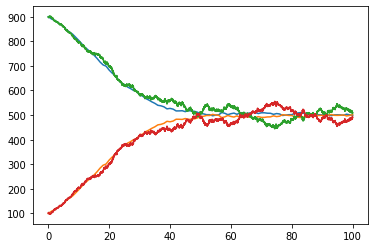

In [101]:
plt.plot(test[:,0],test[:,1])
plt.plot(test[:,0],test[:,2])
plt.plot(testy[:,0],testy[:,1])
plt.plot(testy[:,0],testy[:,2])